In [238]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
import xgboost as xgb
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



In [207]:
def model(classifier_name, X, y):
    print(classifier_name)
    print('data shape:{0}'.format(X.shape))
#     classifier = RandomForestClassifier(n_jobs=8,class_weight = {0: 1000, 1: 1})
    classifier = RandomForestClassifier(n_jobs=10)
#     classifier = xgb.XGBClassifier(objective='binary:logistic', n_jobs=10)
    # classifier = xgb.XGBClassifier(objective='binary:logistic', n_jobs=8,scale_pos_weight=0.1)
#     classifier = tree.DecisionTreeClassifier()
    classifier.fit(X=X, y=y)
    # jl.dump(classifier,'{0}.joblib'.format(classifier_name))
    return classifier

def evaluate_performance(prefix, classifier, X, y):
    """
    :param classifier: Trained classifier
    :param X: array-like of shape (n_samples,n_features)
    :param y:array-like of shape (n_samples)
    :return: None
    """
    print(prefix)
    y_predict = classifier.predict(X)
    print('y_val counter:{0}'.format(Counter(y)))
    print('y_predict counter:{0}'.format(Counter(y_predict)))
    y_predict_proba = classifier.predict_proba(X)

    pos_count = len(y_predict[y_predict==1])
    tp = 0
    for i in range(len(y_predict)):
        if y.iloc[i]==1 and y.iloc[i]== y_predict[i]:
            tp = tp+1
    print('pos_count',pos_count,tp)

    target_names = ['class 0', 'class 1']
    precision = metrics.precision_score(y, y_pred=y_predict, average='macro')
    recall = metrics.recall_score(y,y_predict)
    print(classification_report(y_true=y, y_pred=y_predict))
    print('roc_auc_score:{0}'.format(metrics.roc_auc_score(y_true=y,y_score=y_predict)))
    metrics.plot_roc_curve(estimator=classifier, X=X, y=y)
    metrics.plot_confusion_matrix(classifier, X, y)
    print('precision:{0}'.format(precision))
    print('recall:{0}'.format(recall))
    print(metrics.confusion_matrix(y,y_predict))

    
    
def _plot(X, y, labels, title):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], marker='o', c=y)
    ax.set_xlabel('X label')
    ax.set_ylabel('Y label')
    ax.set_zlabel('Z label')
    ax.set_title(title)
    plt.show()
    
def mynormalize(data):
    """
    Rescaling data to have values between 0 and 1
    :param data:numpy array ,shape:(n_samples,n_features)
    :return:
    """
    data = (data - np.min(data)) / (np.max(data) - np.min(data))
    return data

In [140]:
df = pd.read_csv('creditcard.csv',sep=',')

In [141]:
print(df.shape)
c = Counter(df['Class'])
c[1]/c[0]

(284807, 31)


0.0017304750013189597

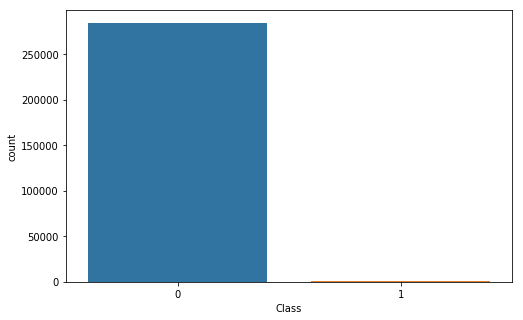

In [148]:
fig = plt.figure(figsize=(8,5))
sns.countplot(df['Class'])

In [62]:
columns = df.columns.to_list()
print(columns)
X,y = df[columns[1:-1]],df[columns[-1]]
print(X.shape,y.shape)

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']
(284807, 29) (284807,)


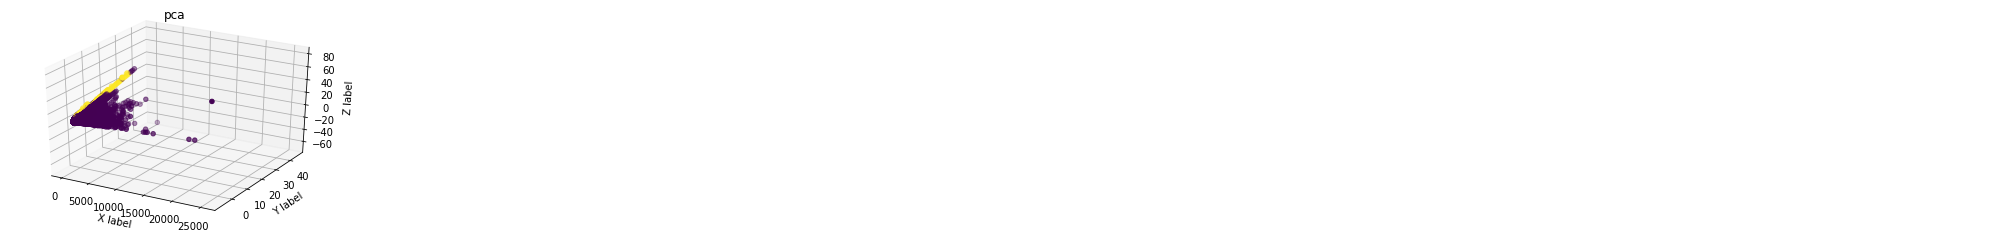

In [184]:
pca = PCA(n_components=3)
X_re = pca.fit_transform(X)
_plot(X_re,y,'pca',title='pca')

# train val test split 

In [191]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.25,random_state=42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)
print(X_val.shape)
print(X_train.shape[0]/X.shape[0],X_val.shape[0]/X.shape[0],X_test.shape[0]/X.shape[0])

(170883, 29) (170883,)
(56962, 29) (56962,)
(56962, 29)
0.5999957866204131 0.20000210668979343 0.20000210668979343


# BaseLine

RandomForest
data shape:(170883, 29)
val dataset
y_val counter:Counter({0: 56884, 1: 78})
y_predict counter:Counter({0: 56902, 1: 60})
pos_count 60 58
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56884
           1       0.97      0.74      0.84        78

    accuracy                           1.00     56962
   macro avg       0.98      0.87      0.92     56962
weighted avg       1.00      1.00      1.00     56962

roc_auc_score:0.8717772921591219
precision:0.9831575925860837
recall:0.7435897435897436
[[56882     2]
 [   20    58]]


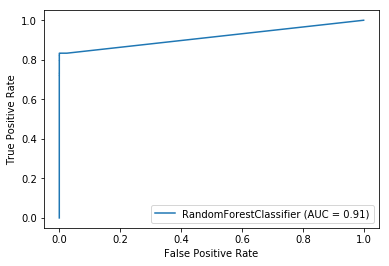

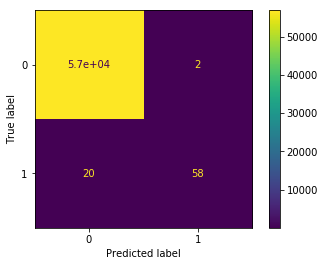

In [192]:
classifier = model('RandomForest',X_train,y_train)
evaluate_performance('val dataset',classifier,X_val,y_val)

# balance dataset
## Under Sample

In [169]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.25,random_state=42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)
print(X_val.shape)
print(X_train.shape[0]/X.shape[0],X_val.shape[0]/X.shape[0],X_test.shape[0]/X.shape[0])
ros = RandomUnderSampler(random_state=42)
X_train,y_train = ros.fit_resample(X=X_train,y=y_train)
print('Original :{0}'.format(Counter(y_train)))
print('Undersample :{0}'.format(Counter(y_train)))

(170883, 29) (170883,)
(56962, 29) (56962,)
(56962, 29)
0.5999957866204131 0.20000210668979343 0.20000210668979343
Original :Counter({0: 316, 1: 316})
Undersample :Counter({0: 316, 1: 316})


RandomForest
data shape:(632, 29)
val dataset
y_val counter:Counter({0: 56884, 1: 78})
y_predict counter:Counter({0: 53162, 1: 3800})
pos_count 3800 67
              precision    recall  f1-score   support

           0       1.00      0.93      0.97     56884
           1       0.02      0.86      0.03        78

    accuracy                           0.93     56962
   macro avg       0.51      0.90      0.50     56962
weighted avg       1.00      0.93      0.96     56962

roc_auc_score:0.896674789359903
precision:0.5087123321169256
recall:0.8589743589743589
[[53151  3733]
 [   11    67]]


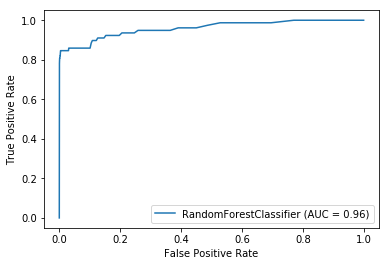

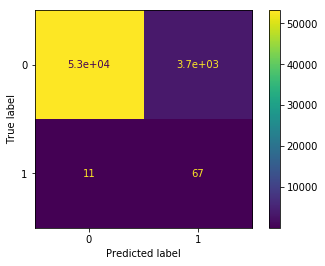

In [170]:
classifier = model('RandomForest',X_train,y_train)
evaluate_performance('val dataset',classifier,X_val,y_val)

## Over Sample

In [194]:
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)
# X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.25,random_state=42)
# print(X_train.shape,y_train.shape)
# print(X_test.shape,y_test.shape)
# print(X_val.shape)
# print(X_train.shape[0]/X.shape[0],X_val.shape[0]/X.shape[0],X_test.shape[0]/X.shape[0])
ros = RandomOverSampler(random_state=42)
X_train,y_train = ros.fit_resample(X=X_train,y=y_train)
print('Original :{0}'.format(Counter(y_train)))
print('Undersample :{0}'.format(Counter(y_train)))

Original :Counter({0: 170567, 1: 170567})
Undersample :Counter({0: 170567, 1: 170567})


In [208]:
classifier = model('RandomForest',X_train,y_train)

RandomForest
data shape:(341134, 29)


val dataset
y_val counter:Counter({0: 56884, 1: 78})
y_predict counter:Counter({0: 56901, 1: 61})
pos_count 61 59
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56884
           1       0.97      0.76      0.85        78

    accuracy                           1.00     56962
   macro avg       0.98      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962

roc_auc_score:0.8781875485693783
precision:0.9834396007330535
recall:0.7564102564102564
[[56882     2]
 [   19    59]]


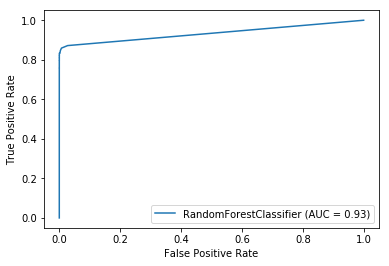

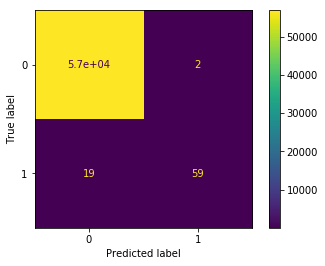

In [209]:
evaluate_performance('val dataset',classifier,X_val,y_val)

In [230]:
import math
def cvd_risk_score(age):
	"""
	 计算10年心血管病风险得分
	:param gendercode:   性别编码 1:男 2：女
	:param age:          年龄
	:param tc:           总胆固醇
	:param hdl:          高密度脂蛋白
	:param smoke:        是否抽烟
	:param diabetes:     糖尿病
	:param sbp:          收缩压
	:return: int
	"""
	if age < 40:
		age_score = 0
	else:
		age_score = math.ceil((age - 39)/5.0)*1
	print(age,age_score)

In [237]:
cvd_risk_score(65)

65 6
